In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('bank_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [4]:
df.tail()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1
40840,45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,8.47,4,-1,0,unknown,no,0


In [5]:
df.shape

(40841, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

In [7]:
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,22006.477657,40.790676,1073.981807,15.863666,4.308949,2.774149,32.248304,0.436791,0.113587
std,12919.797651,10.475473,1712.556186,8.313608,4.305823,3.104177,90.738402,1.572342,0.317313
min,0.000000,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,10888.000000,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,21652.000000,39.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,33102.000000,48.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,45209.000000,95.000000,10443.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000


In [8]:
# Dropping the unnecessary columns
df.drop(['Unnamed: 0','response'], axis=1, inplace=True)

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


In [10]:
# Dropping the rows with null values
df.dropna()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,1
40837,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,1
40838,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,1
40839,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,1


In [11]:
df.shape

(40841, 16)

In [12]:
duplicate_rows_df = df[df.duplicated()]
print('Number of duplicate rows:', duplicate_rows_df.shape)
# No duplicate data is present in the dataset

Number of duplicate rows: (0, 16)


In [13]:
# Defining numerical and categorical variables
num_atr=['age' , 'balance' , 'day' , 'duration' , 'campaign' , 'pdays' , 'previous']

cat_atr=['job' , 'marital' , 'education' , 'default' , 'housing' , 'loan' , 'poutcome' , 'month']

In [14]:
# Correlation Matrix
df.corr()

,age,balance,day,duration,campaign,pdays,previous,response_binary
age,1.000000,0.103405,-0.010549,-0.007422,0.003563,-0.005815,0.012862,0.023204
balance,0.103405,1.000000,0.008062,0.035481,-0.026482,0.017674,0.036765,0.069456
day,-0.010549,0.008062,1.000000,-0.032656,0.172387,-0.089812,-0.056279,-0.035323
duration,-0.007422,0.035481,-0.032656,1.000000,-0.081852,-0.000242,0.004824,0.400681
campaign,0.003563,-0.026482,0.172387,-0.081852,1.000000,-0.094891,-0.051522,-0.072495
pdays,-0.005815,0.017674,-0.089812,-0.000242,-0.094891,1.000000,0.567728,0.108554
previous,0.012862,0.036765,-0.056279,0.004824,-0.051522,0.567728,1.000000,0.128274
response_binary,0.023204,0.069456,-0.035323,0.400681,-0.072495,0.108554,0.128274,1.000000


In [15]:
df.job.value_counts()

blue-collar      8805
management       8565
technician       6954
admin.           4705
services         3801
retired          2020
self-employed    1443
entrepreneur     1340
unemployed       1212
housemaid        1149
student           689
other             158
Name: job, dtype: int64

In [16]:
df.marital.value_counts()

married     24641
single      11443
divorced     4757
Name: marital, dtype: int64

In [17]:
df.education.value_counts()

secondary    21933
tertiary     12380
primary       6528
Name: education, dtype: int64

In [18]:
df.default.value_counts()
# Majority of people do not have credit in default

no     40078
yes      763
Name: default, dtype: int64

In [19]:
df.housing.value_counts()
# More than half of the people in the sample dataset have a housing loan

yes    22820
no     18021
Name: housing, dtype: int64

In [20]:
df.loan.value_counts()
# Only about 20% people in the sample dataset have taken a personal loan

no     34042
yes     6799
Name: loan, dtype: int64

In [21]:
df.poutcome.value_counts()
# The success of the pervious campaign is very low and most of the results were unknown

unknown    34802
failure     4648
success     1391
Name: poutcome, dtype: int64

In [22]:
df.month.value_counts()
# May has been the most important month for the bank and most of the calls regarding the term loan were made during this period

may    12496
jul     6520
aug     5877
jun     4853
nov     3483
apr     2529
feb     2258
jan     1183
oct      605
sep      457
mar      407
dec      173
Name: month, dtype: int64

In [23]:
df.response_binary.value_counts()
# Only 463 people have subscribed to the term loan

0    36202
1     4639
Name: response_binary, dtype: int64

In [24]:
df.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
balance              int64
housing             object
loan                object
day                  int64
month               object
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome            object
response_binary      int64
dtype: object

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'response_binary'],
      dtype='object')

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


In [27]:
pd.crosstab(df['job'] , df['response_binary'])
# Students have shown the highest ratio among the subscribed users which is closely followed by retired people

response_binary,0,1
job,,
admin.,4142,563
blue-collar,8168,637
entrepreneur,1231,109
housemaid,1048,101
management,7440,1125
other,143,15
retired,1572,448
self-employed,1281,162
services,3469,332


In [28]:
pd.crosstab(df['marital'] , df['response_binary'])
# Married people constitues most of the sample and also the rate of subscription is very low among them

response_binary,0,1
marital,,
divorced,4205,552
married,22228,2413
single,9769,1674


In [29]:
pd.crosstab(df['education'] , df['response_binary'])

response_binary,0,1
education,,
primary,5981,547
secondary,19654,2279
tertiary,10567,1813


In [30]:
pd.crosstab(df['default'] , df['response_binary'])

response_binary,0,1
default,,
no,35485,4593
yes,717,46


In [31]:
pd.crosstab(df['housing'] , df['response_binary'])

response_binary,0,1
housing,,
no,15119,2902
yes,21083,1737


In [32]:
pd.crosstab(df['loan'] , df['response_binary'])

response_binary,0,1
loan,,
no,29857,4185
yes,6345,454


In [33]:
pd.crosstab(df['poutcome'] , df['response_binary'])

response_binary,0,1
poutcome,,
failure,4069,579
success,495,896
unknown,31638,3164


In [34]:
pd.crosstab(df['month'] , df['response_binary'])

response_binary,0,1
month,,
apr,2033,496
aug,5263,614
dec,94,79
feb,1868,390
jan,1061,122
jul,5968,552
jun,4363,490
mar,186,221
may,11670,826


In [35]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


In [36]:
df[['balance','response_binary']].sort_values('balance', ascending = False)
# It can be observed that people with higher balance usually does not subscribe for term loan

,balance,response_binary
24037,10443,0
9062,10442,0
13721,10438,0
6077,10436,0
3266,10399,0
...,...,...
30290,-3058,1
1766,-3313,0
6981,-3372,0
35504,-4057,0


In [37]:
df.duration.mean()
# Mean Duration of the last contact with the customer is 4.3 days

4.308949340123857

In [38]:
df.balance.mean()
# The mean balance level of the customers

1073.9818074973678

In [39]:
# Visualizations

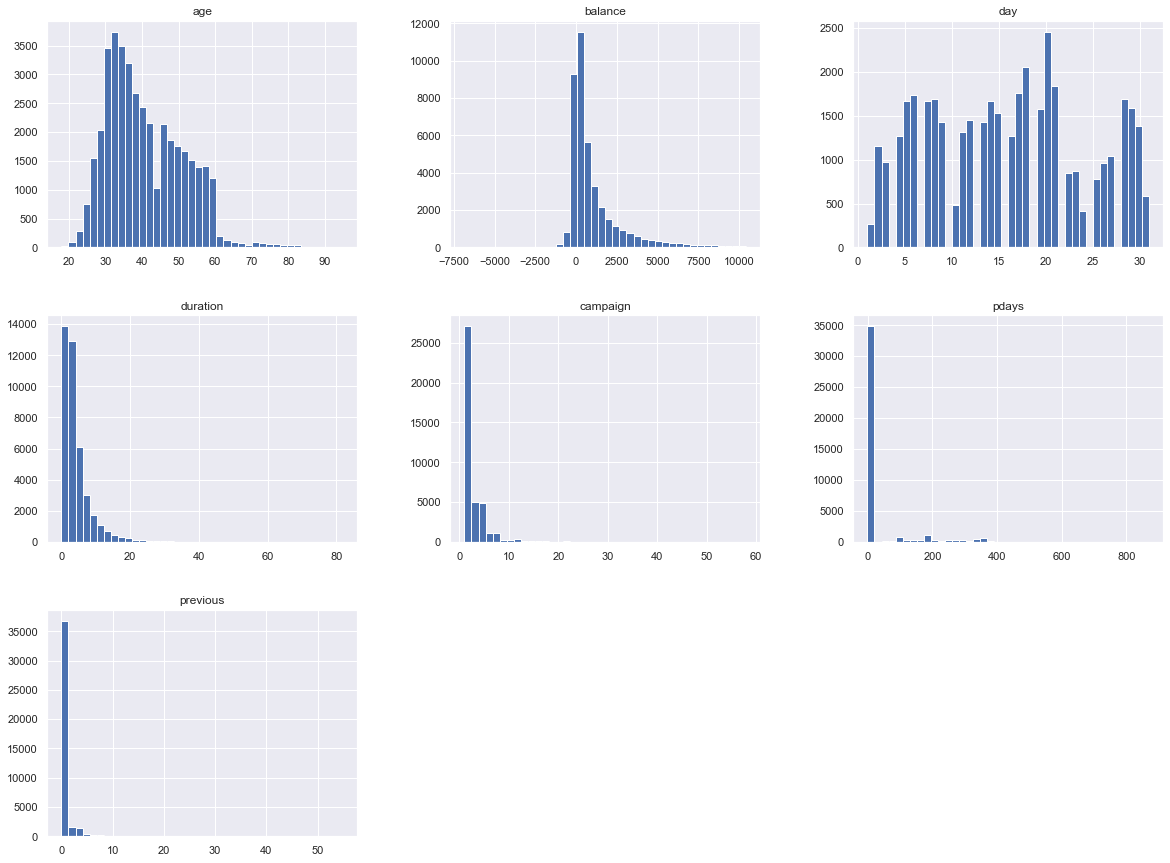

In [40]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()
# Histogram of all the numerical attributes

In [41]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


<AxesSubplot:xlabel='job', ylabel='count'>

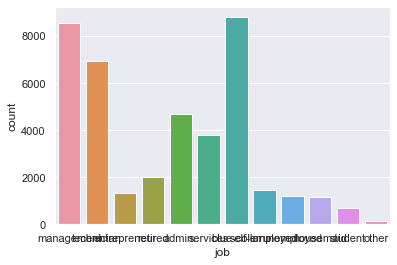

In [42]:
sns.countplot(x = 'job', data = df)

<AxesSubplot:xlabel='marital', ylabel='count'>

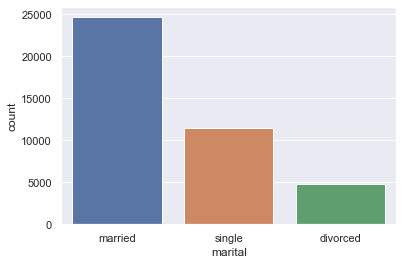

In [43]:
sns.countplot(x = 'marital', data = df)
# More than half of all the customers are married

<AxesSubplot:xlabel='housing', ylabel='count'>

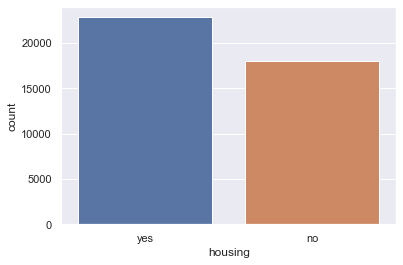

In [46]:
sns.countplot(x = 'housing', data = df)
# More than half of the customers have a housing loan

<AxesSubplot:xlabel='loan', ylabel='count'>

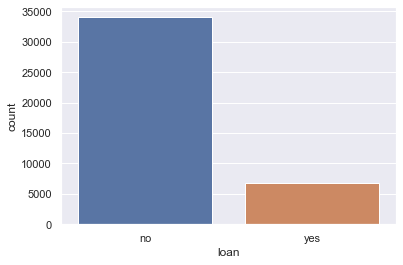

In [47]:
sns.countplot(x = 'loan', data = df)
# About 17% customers have a personal loan

<AxesSubplot:xlabel='poutcome', ylabel='count'>

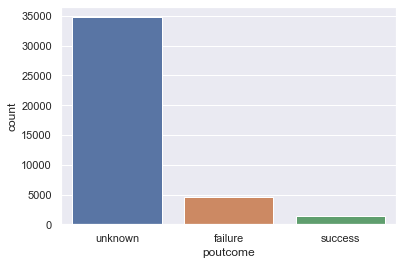

In [48]:
sns.countplot(x = 'poutcome', data = df)
# The outcome of the previous campaign was mostly unknown

In [50]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


<AxesSubplot:xlabel='job', ylabel='response_binary'>

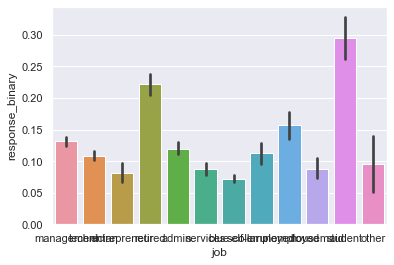

In [51]:
sns.barplot(x = 'job', y = 'response_binary', data = df)
# Most of the positive responses have been seen from students and retired people

<AxesSubplot:xlabel='marital', ylabel='response_binary'>

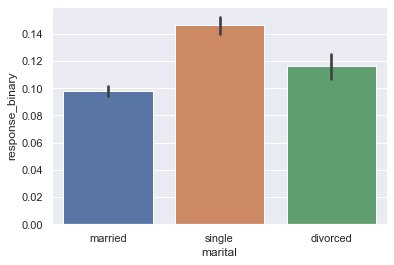

In [52]:
sns.barplot(x = 'marital', y = 'response_binary', data = df)
# Although the count of the married people is the maximum, but they have the least subscription rate

<AxesSubplot:xlabel='education', ylabel='response_binary'>

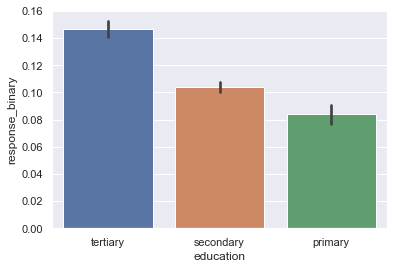

In [53]:
sns.barplot(x = 'education', y = 'response_binary', data = df)
# People with tertiary education have subscribed the most

<AxesSubplot:xlabel='month', ylabel='response_binary'>

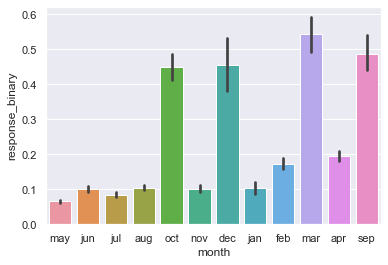

In [54]:
sns.barplot(x = 'month', y = 'response_binary', data = df)
# Most of the positive responses can be seen in the months of October, December, March and September

<AxesSubplot:xlabel='response_binary', ylabel='age'>

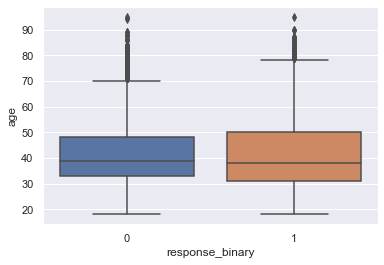

In [56]:
sns.boxplot(x = 'response_binary', y = 'age', data = df)
# The mean age of the respondants in both the cases is similar

In [57]:
df_corr = df.corr()
df_corr

,age,balance,day,duration,campaign,pdays,previous,response_binary
age,1.000000,0.103405,-0.010549,-0.007422,0.003563,-0.005815,0.012862,0.023204
balance,0.103405,1.000000,0.008062,0.035481,-0.026482,0.017674,0.036765,0.069456
day,-0.010549,0.008062,1.000000,-0.032656,0.172387,-0.089812,-0.056279,-0.035323
duration,-0.007422,0.035481,-0.032656,1.000000,-0.081852,-0.000242,0.004824,0.400681
campaign,0.003563,-0.026482,0.172387,-0.081852,1.000000,-0.094891,-0.051522,-0.072495
pdays,-0.005815,0.017674,-0.089812,-0.000242,-0.094891,1.000000,0.567728,0.108554
previous,0.012862,0.036765,-0.056279,0.004824,-0.051522,0.567728,1.000000,0.128274
response_binary,0.023204,0.069456,-0.035323,0.400681,-0.072495,0.108554,0.128274,1.000000


In [58]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


<AxesSubplot:>

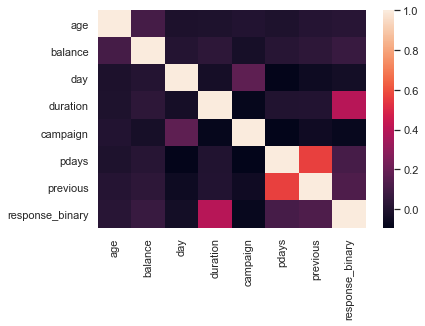

In [60]:
sns.heatmap(df_corr)
# Response of the customers is highly dependent on duration of the contact

In [61]:
import altair as alt

In [62]:
df1 = df.iloc[:4500]
df1.shape

(4500, 16)

In [63]:
alt.Chart(df1).mark_circle().encode(
x='duration',
y='balance',
color='response_binary',
tooltip= ['job', 'marital', 'education', 'housing', 'loan', 'campaign']
).interactive()

alt.Chart(...)

In [64]:
# Random Forest Classifier

In [65]:
from sklearn.model_selection import train_test_split
X= df.drop(['response_binary'], axis=1)
y= df['response_binary']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [69]:
X_train[cat_atr].head()

,job,marital,education,default,housing,loan,poutcome,month
8006,1,1,0,0,1,0,2,6
6900,1,1,1,0,1,1,2,8
19270,3,1,1,0,0,0,2,1
5185,8,1,1,0,0,0,2,8
4791,4,1,2,0,1,0,2,8


In [70]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.03279024, -0.42201272, -1.54203421, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.62526263,  1.59065425, ...,  0.06650842,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.00846378, -0.45764205, ..., -0.25266947,
        -0.36824873, -0.27816025],
       ...,
       [-0.27033512, -0.31627578,  0.86772615, ..., -0.25266947,
        -0.36824873, -0.27816025],
       [ 0.87334756, -0.62232549, -1.06008214, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [ 1.06396134, -0.60998952, -0.93959412, ..., -0.25266947,
         3.66926515,  0.35567087]])

In [71]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(28588, 15)

In [72]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(12253, 15)

In [73]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

In [74]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9089202644250388


In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[10566,   259],
       [  857,   571]], dtype=int64)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10825
           1       0.69      0.40      0.51      1428

    accuracy                           0.91     12253
   macro avg       0.81      0.69      0.73     12253
weighted avg       0.90      0.91      0.90     12253



In [77]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'response_binary'],
      dtype='object')

In [79]:
df.feature_names = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome']]
df.target_names = df['response_binary']

<ipython-input-79-eeee48a55ae5>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.feature_names = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
<ipython-input-79-eeee48a55ae5>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target_names = df['response_binary']


In [80]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

10    0.298049
5     0.117071
0     0.111898
8     0.094532
9     0.089840
1     0.051040
14    0.045732
12    0.043586
11    0.041719
13    0.024793
6     0.024085
2     0.023457
3     0.022615
7     0.009602
4     0.001981
dtype: float64

In [81]:
list(zip(df.columns, feature_imp))

[('age', 0.2980491809946079),
 ('job', 0.117071390132452),
 ('marital', 0.11189757918688796),
 ('education', 0.0945321891608734),
 ('default', 0.08984019965717488),
 ('balance', 0.051039592120959716),
 ('housing', 0.04573158513128676),
 ('loan', 0.04358626265160971),
 ('day', 0.0417193360149125),
 ('month', 0.02479332656572223),
 ('duration', 0.024085072969220227),
 ('campaign', 0.02345652349443523),
 ('pdays', 0.022615039303247438),
 ('previous', 0.009601774745737375),
 ('poutcome', 0.0019809478708728272)]

No handles with labels found to put in legend.


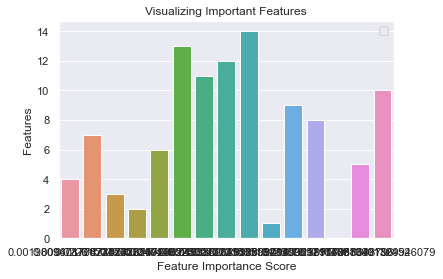

In [82]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [85]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9085122010936098


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10825
           1       0.68      0.40      0.51      1428

    accuracy                           0.91     12253
   macro avg       0.80      0.69      0.73     12253
weighted avg       0.90      0.91      0.90     12253

